<a href="https://colab.research.google.com/github/amandamarilia/Pre-os-de-autom-veis/blob/main/Pre%C3%A7os_de_autom%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [2]:
#Doc
carro = pd.read_csv('Precos_carros.csv')
carro.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
#Verificação de valores nulos
carro_missing = (
  carro.isna().sum()
  .to_frame('missing_count')
  .join((carro.isna().sum() / carro.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)
carro_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
car_ID,0,0.00%
symboling,0,0.00%
highwaympg,0,0.00%
citympg,0,0.00%
peakrpm,0,0.00%
horsepower,0,0.00%
compressionratio,0,0.00%
stroke,0,0.00%
boreratio,0,0.00%
fuelsystem,0,0.00%


In [29]:
#Substituição de textos para números
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#nome do carro
le.fit(carro.CarName)
carro.CarName = le.transform(carro.CarName)

#Tipo de combustivel
le.fit(carro.fueltype)
carro.fueltype = le.transform(carro.fueltype)

#Aspiração
le.fit(carro.aspiration)
carro.aspiration = le.transform(carro.aspiration)

#Número de portas
le.fit(carro.doornumber)
carro.doornumber = le.transform(carro.doornumber)

#Carroceria
le.fit(carro.carbody)
carro.carbody = le.transform(carro.carbody)

#Roda
le.fit(carro.drivewheel)
carro.drivewheel = le.transform(carro.drivewheel)

#Engine Location
le.fit(carro.enginelocation)
carro.enginelocation = le.transform(carro.enginelocation)

#fuel system
le.fit(carro.fuelsystem)
carro.fuelsystem = le.transform(carro.fuelsystem)

#Tipo de motor
le.fit(carro.enginetype)
carro.enginetype = le.transform(carro.enginetype)

#Número de cilindro
le.fit(carro.cylindernumber)
carro.cylindernumber = le.transform(carro.cylindernumber)


In [100]:
carro.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
#Normalização, deixando as variaveis nas mesmas escalas

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

carro_norm = pd.DataFrame(scaler.fit_transform(carro),columns=carro.columns,index=carro.index)

In [97]:
carro_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


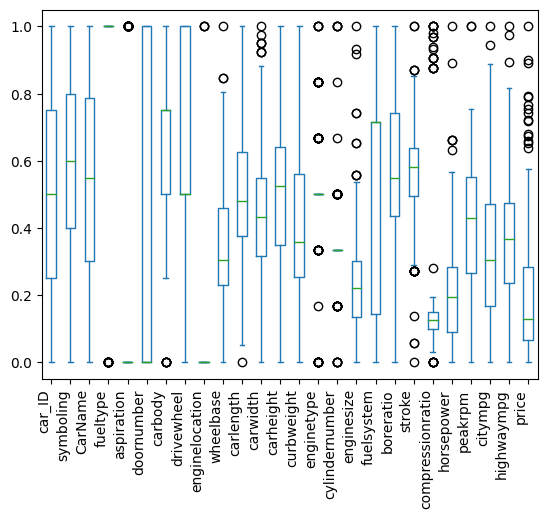

In [98]:
#Verificação de outliers
carro_norm.plot.box()
plt.xticks(rotation=90, ha='right')
plt.show();

In [107]:
from sklearn.preprocessing import scale

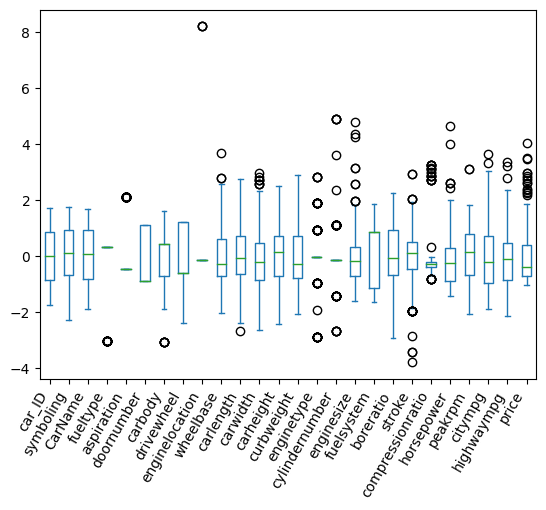

In [108]:
#Verificação de outliers
carro_norm.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')
plt.show();

In [101]:
def is_outliers (array, extreme=False):
    q1,q3 = np.quantile(array,[.25,.75])
    iqr = q3 - q1

    factor= 3. if extreme else 1.5
    upper_outlier = q1 - factor * iqr
    lower_outlier = q3 + factor * iqr

    return (array < lower_outlier) | (array > upper_outlier)

In [116]:
carro_norm.apply(is_outliers).sum()

car_ID              205
symboling           205
CarName             205
fueltype             20
aspiration           37
doornumber          205
carbody             205
drivewheel          205
enginelocation        3
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype           57
cylindernumber       46
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [114]:
#Remoção de outliers
carro_norm[carro_norm.apply(is_outliers).any(axis=1)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.980392,0.2,0.952055,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,...,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.985294,0.2,0.945205,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,...,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.990196,0.2,0.958904,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,...,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.995098,0.2,0.972603,0.0,1.0,0.0,0.75,1.0,0.0,0.655977,...,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


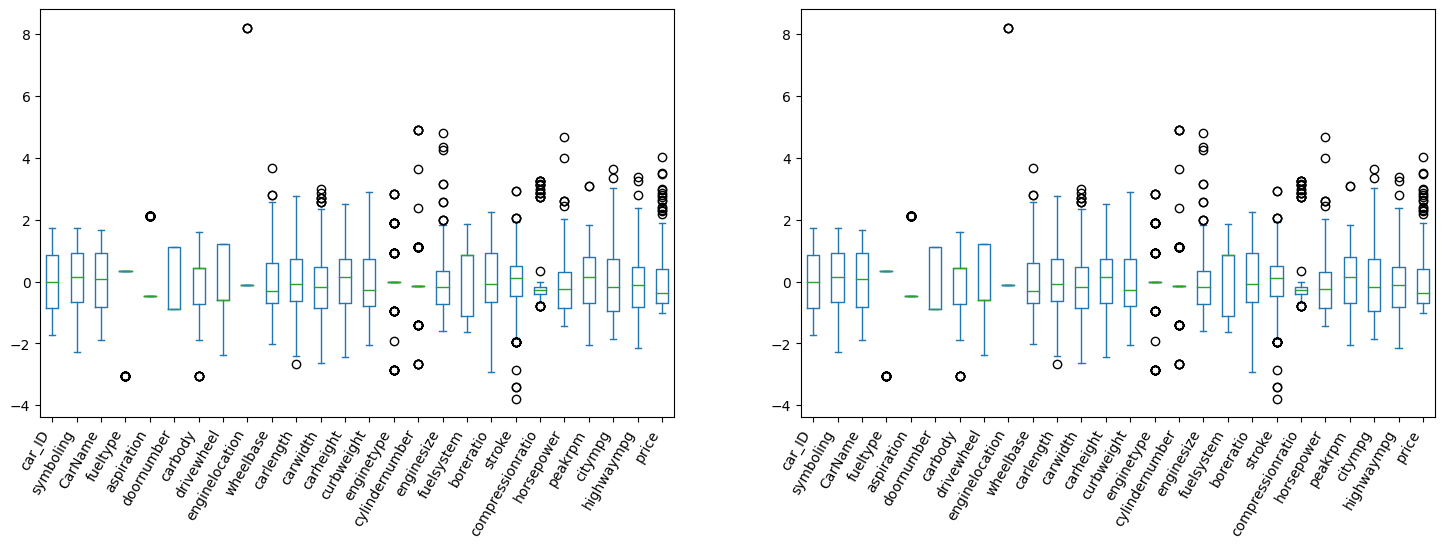

In [113]:
carro_norm_sem_outliers = carro_norm[~carro_norm.apply(is_outliers).any(axis=1)]

fig, axes = plt.subplots(ncols=2, figsize=(18,6))

carro_norm.apply(scale).plot.box(ax=axes[0])
carro_norm.apply(scale).plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=60, ha='right')
plt.show();


In [118]:
carro_norm_sem_outliers.apply(is_outliers).sum()

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [119]:
carro_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


<Axes: xlabel='price', ylabel='Count'>

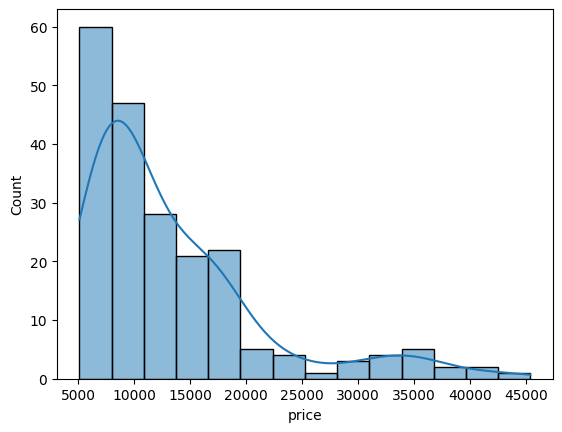

In [120]:
#Verificação com histograma
sns.histplot(data=carro, x='price', kde=True)

# models MRLS

In [124]:
import statsmodels.formula.api as smf

#Models MRLS
function = 'price ~ symboling+ CarName+fueltype +aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.26e-76
Time:                        02:36:53   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [125]:
#Models MRLS
function = 'price ~ CarName+fueltype +aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.48
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.77e-77
Time:                        02:37:20   Log-Likelihood:                 275.53
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1118      0.189  

In [126]:
#Models MRLS
function = 'price ~ CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.22e-78
Time:                        02:37:44   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [127]:
#Models MRLS
function = 'price ~ CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     76.63
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.97e-79
Time:                        02:38:07   Log-Likelihood:                 275.16
No. Observations:                 205   AIC:                            -506.3
Df Residuals:                     183   BIC:                            -433.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0804      0.072  

In [128]:
#Models MRLS
function = 'price ~ CarName+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     80.11
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.22e-79
Time:                        02:38:24   Log-Likelihood:                 274.25
No. Observations:                 205   AIC:                            -506.5
Df Residuals:                     184   BIC:                            -436.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1074      0.069  

In [129]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carlength+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     83.64
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.97e-80
Time:                        02:38:46   Log-Likelihood:                 273.00
No. Observations:                 205   AIC:                            -506.0
Df Residuals:                     185   BIC:                            -439.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1027      0.069  

In [131]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth +carheight+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     88.74
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.24e-81
Time:                        02:39:16   Log-Likelihood:                 272.98
No. Observations:                 205   AIC:                            -508.0
Df Residuals:                     186   BIC:                            -444.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1052      0.068  

In [132]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginetype +cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     92.95
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.64e-81
Time:                        02:39:58   Log-Likelihood:                 271.50
No. Observations:                 205   AIC:                            -507.0
Df Residuals:                     187   BIC:                            -447.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0783      0.066  

In [133]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+cylindernumber+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     98.96
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.12e-82
Time:                        02:40:20   Log-Likelihood:                 271.20
No. Observations:                 205   AIC:                            -508.4
Df Residuals:                     188   BIC:                            -451.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0617      0.062  

In [134]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize +fuelsystem +boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     106.0
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.31e-83
Time:                        02:40:43   Log-Likelihood:                 271.05
No. Observations:                 205   AIC:                            -510.1
Df Residuals:                     189   BIC:                            -456.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0487      0.057  

In [135]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.20e-84
Time:                        02:40:59   Log-Likelihood:                 271.01
No. Observations:                 205   AIC:                            -512.0
Df Residuals:                     190   BIC:                            -462.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0463      0.056  

In [136]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.54e-85
Time:                        02:41:36   Log-Likelihood:                 270.72
No. Observations:                 205   AIC:                            -513.4
Df Residuals:                     191   BIC:                            -466.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0622      0.051  

In [137]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.82e-86
Time:                        02:42:05   Log-Likelihood:                 270.42
No. Observations:                 205   AIC:                            -514.8
Df Residuals:                     192   BIC:                            -471.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0666      0.051  

In [138]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.20e-87
Time:                        02:42:29   Log-Likelihood:                 270.06
No. Observations:                 205   AIC:                            -516.1
Df Residuals:                     193   BIC:                            -476.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0344      0.033  

In [139]:
#Models MRLS
function = 'price ~ CarName+carbody+enginelocation+wheelbase+carwidth+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=carro_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              317.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                   1.51e-117
Time:                        02:42:46   Log-Likelihood:                          269.49
No. Observations:                 205   AIC:                                     -517.0
Df Residuals:                     194   BIC:                                     -480.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [141]:
x = carro_norm[["CarName","doornumber","carbody","drivewheel","enginelocation","carwidth",
      "carheight","curbweight","enginesize","stroke","compressionratio","horsepower",
      "peakrpm"]]

y = carro_norm[["price"]]

In [144]:
#Treinamento do modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [155]:
#Avaliação da performance no conjunto de treino
r = lr.score(x_train,y_train)
print(r)

0.9105271768529652


In [151]:
from sklearn import metrics

In [152]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train,y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train,y_pred_train))

MAE: 0.0449238858129982
MSE: 0.003310072707494449


In [153]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test,y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_test))

MAE: 0.061193060284650845
MSE: 0.008095516703460289
